### Load the data

In [19]:
import pandas as pd

df = pd.read_csv('concrete.csv')
print(df.shape)
df.head()

(1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [20]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'strength'],
      dtype='object')

In [21]:
features = df.columns[:-1]
target = df.columns[-1]

### Dataset preprocessing

In [22]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
strength                                                 0
dtype: int64

In [23]:
df[features].dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
dtype: object

array([[<Axes: title={'center': 'Cement (component 1)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Fly Ash (component 3)(kg in a m^3 mixture)'}>],
       [<Axes: title={'center': 'Water  (component 4)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Superplasticizer (component 5)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'}>],
       [<Axes: title={'center': 'Fine Aggregate (component 7)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Age (day)'}>,
        <Axes: title={'center': 'strength'}>]], dtype=object)

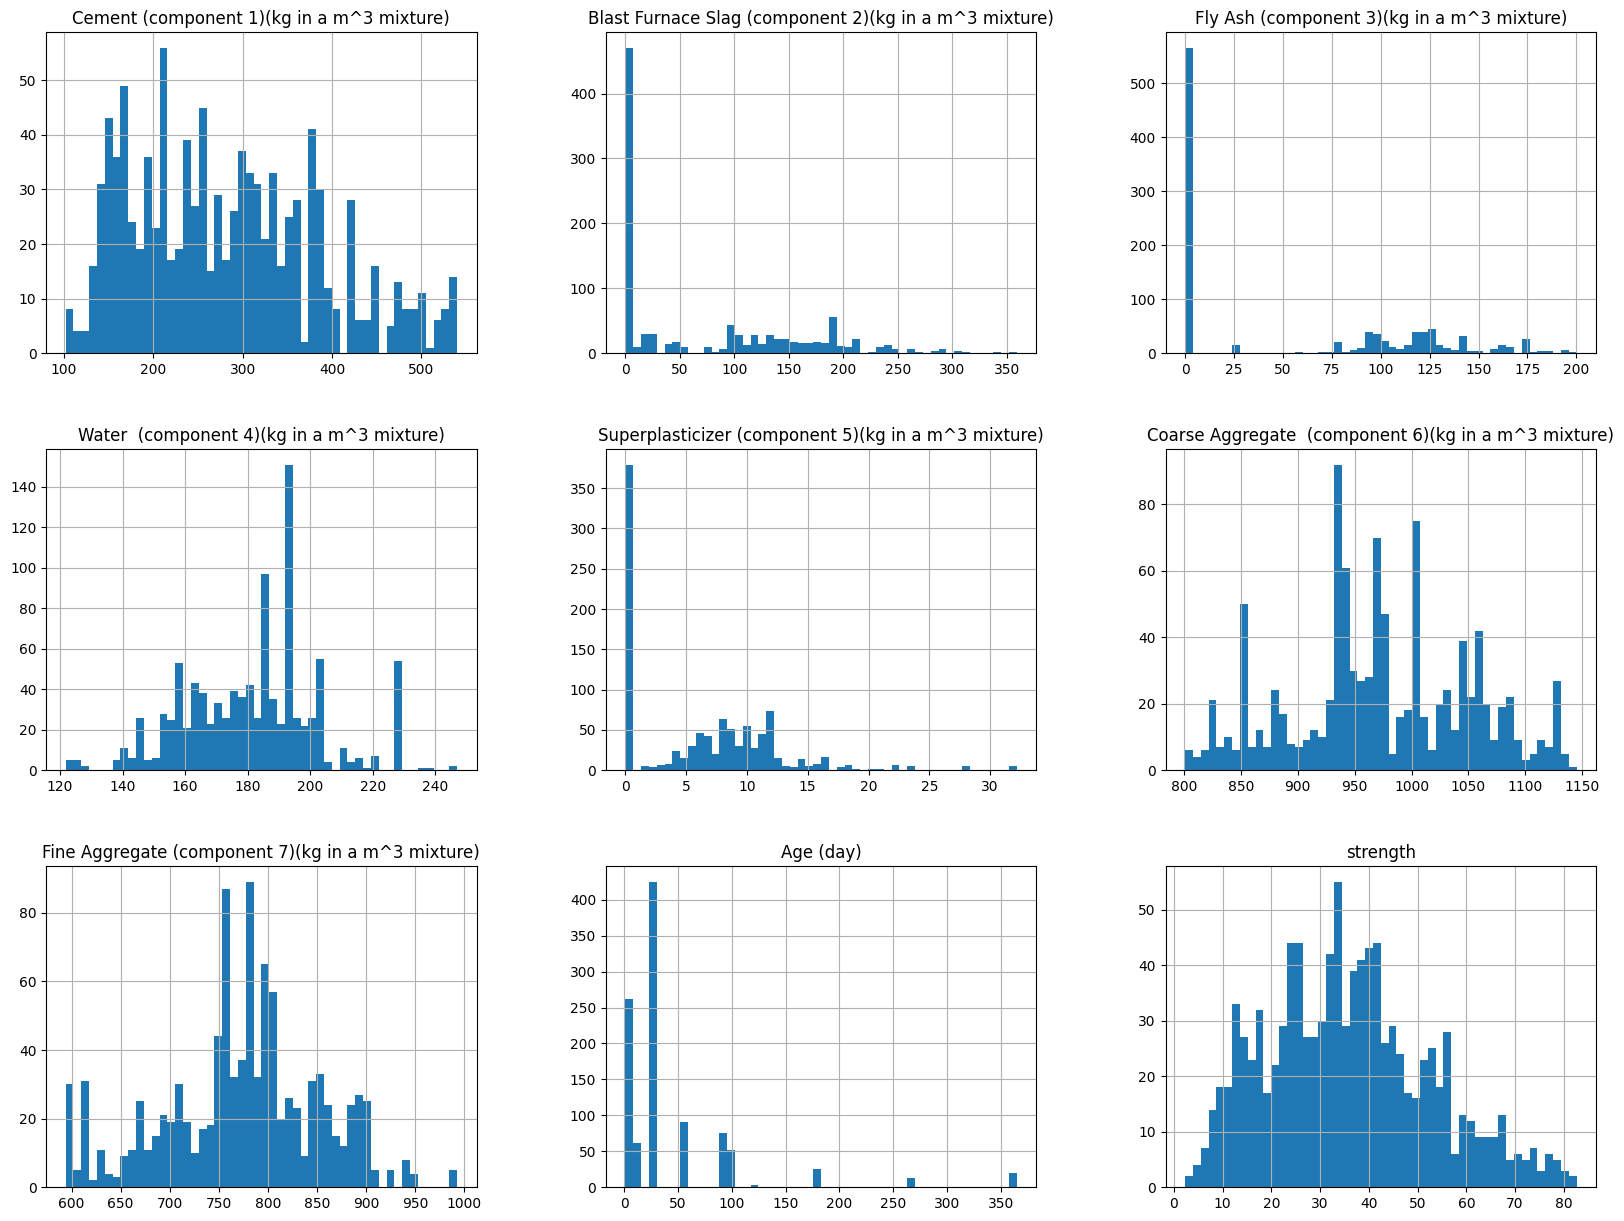

In [24]:
# distribution of the data 
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20, 15))

In [25]:
# remove outliers from dataset
from scipy import stats

z_scores = stats.zscore(df[features])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]
df.shape

(981, 9)

array([[<Axes: title={'center': 'Cement (component 1)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Fly Ash (component 3)(kg in a m^3 mixture)'}>],
       [<Axes: title={'center': 'Water  (component 4)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Superplasticizer (component 5)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'}>],
       [<Axes: title={'center': 'Fine Aggregate (component 7)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Age (day)'}>,
        <Axes: title={'center': 'strength'}>]], dtype=object)

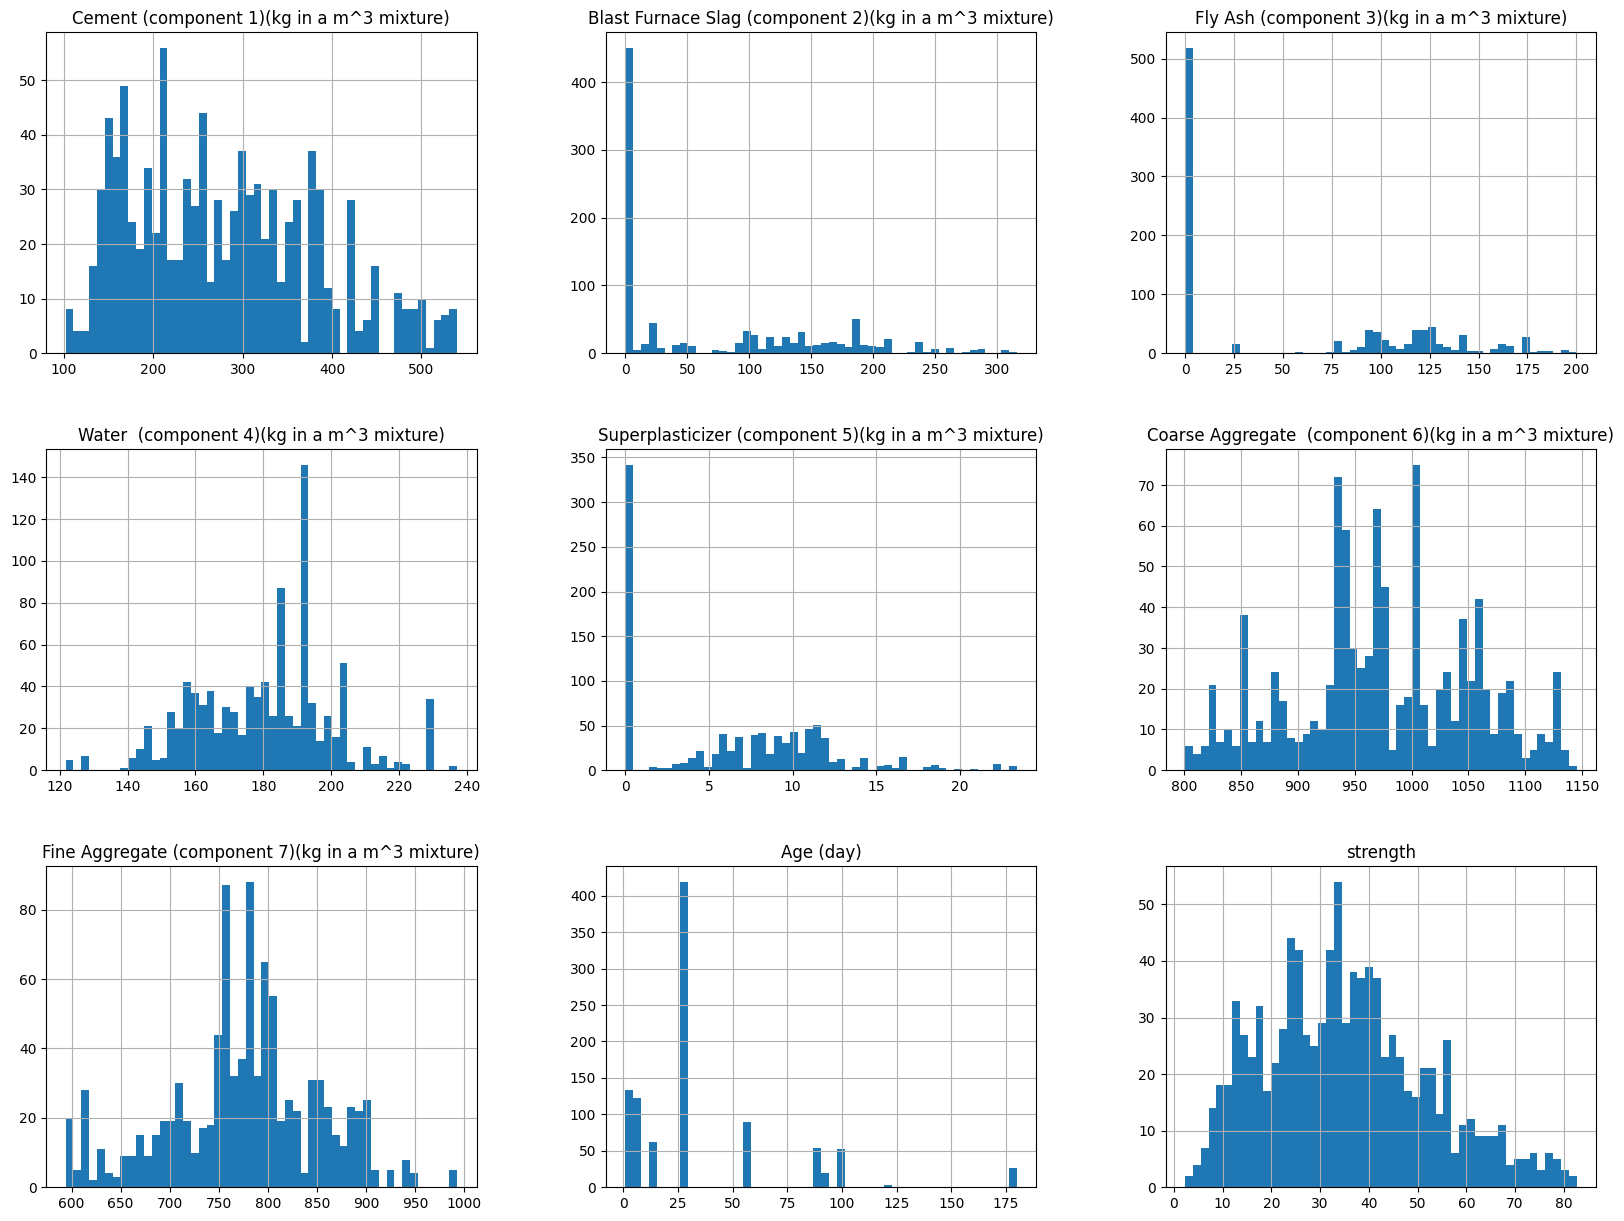

In [26]:
# distribution of the data after removing outliers
df.hist(bins=50, figsize=(20, 15))

In [27]:
# normalize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [28]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

### Linear regression

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

y_pred = lin_reg.predict(X_test)
regression_metrics = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': root_mean_squared_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred)
}
regression_metrics

{'MAE': 7.384207195613039,
 'MSE': 91.4907132703322,
 'RMSE': 9.565077797400928,
 'R2': 0.6531581661044155}

### Random forest regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
y_pred = rf_reg.predict(X_test)
rf_metrics = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': root_mean_squared_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred)
}
rf_metrics

{'MAE': 3.873709703891712,
 'MSE': 33.776627663096725,
 'RMSE': 5.811766311810612,
 'R2': 0.8719526052129305}

### XGBoost regressor

In [34]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
y_pred = xgb_reg.predict(X_test)
xgb_metrics = {
    'MAE': mean_absolute_error(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred),
    'RMSE': root_mean_squared_error(y_test, y_pred),
    'R2': r2_score(y_test, y_pred)
}
xgb_metrics

{'MAE': 3.361529244069521,
 'MSE': 30.408145236201058,
 'RMSE': 5.5143580982922265,
 'R2': 0.8847225419707457}

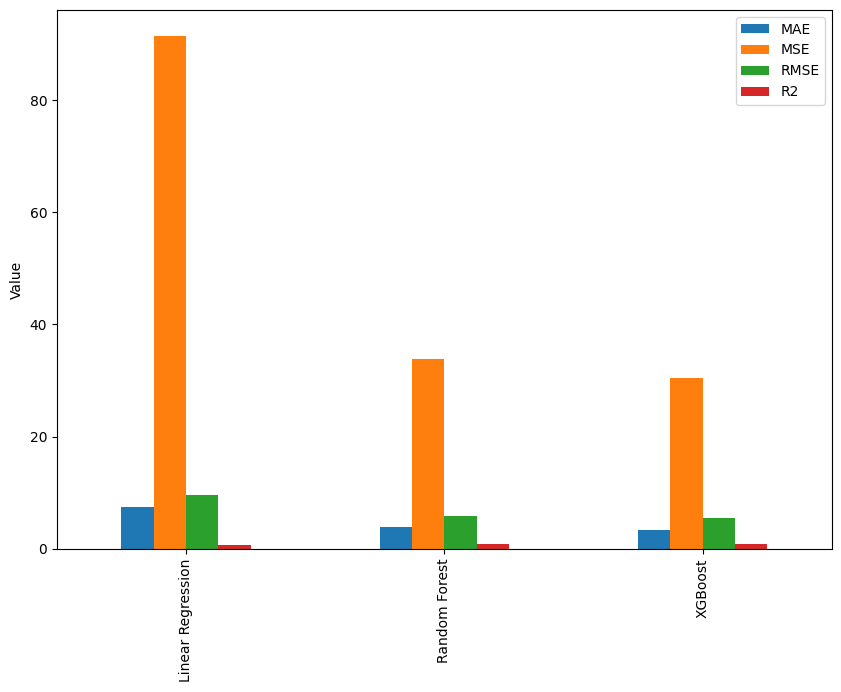

In [36]:
# Plot performance metrics of all models
import matplotlib.pyplot as plt

metrics = pd.DataFrame([regression_metrics, rf_metrics, xgb_metrics], index=['Linear Regression', 'Random Forest', 'XGBoost'])
metrics.plot(kind='bar', figsize=(10, 7))
plt.ylabel('Value')
plt.show()

### Feature importance

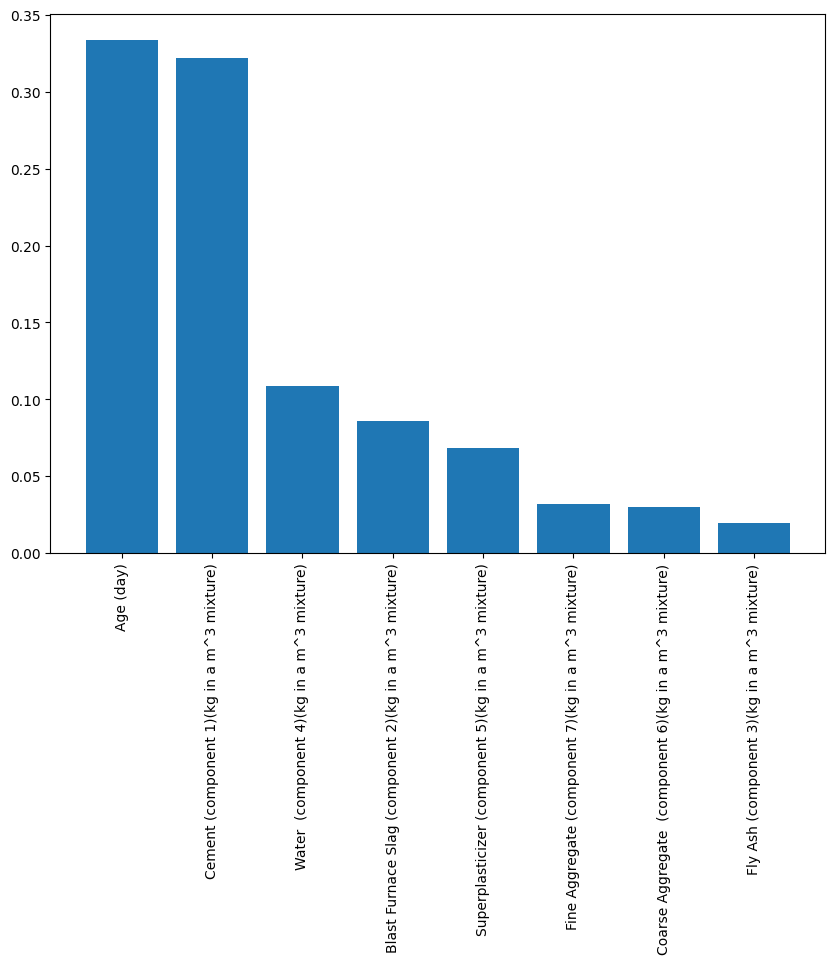

In [37]:
importances = rf_reg.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
plt.figure(figsize=(10, 7))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), df.columns[:-1][indices], rotation=90)
plt.show()

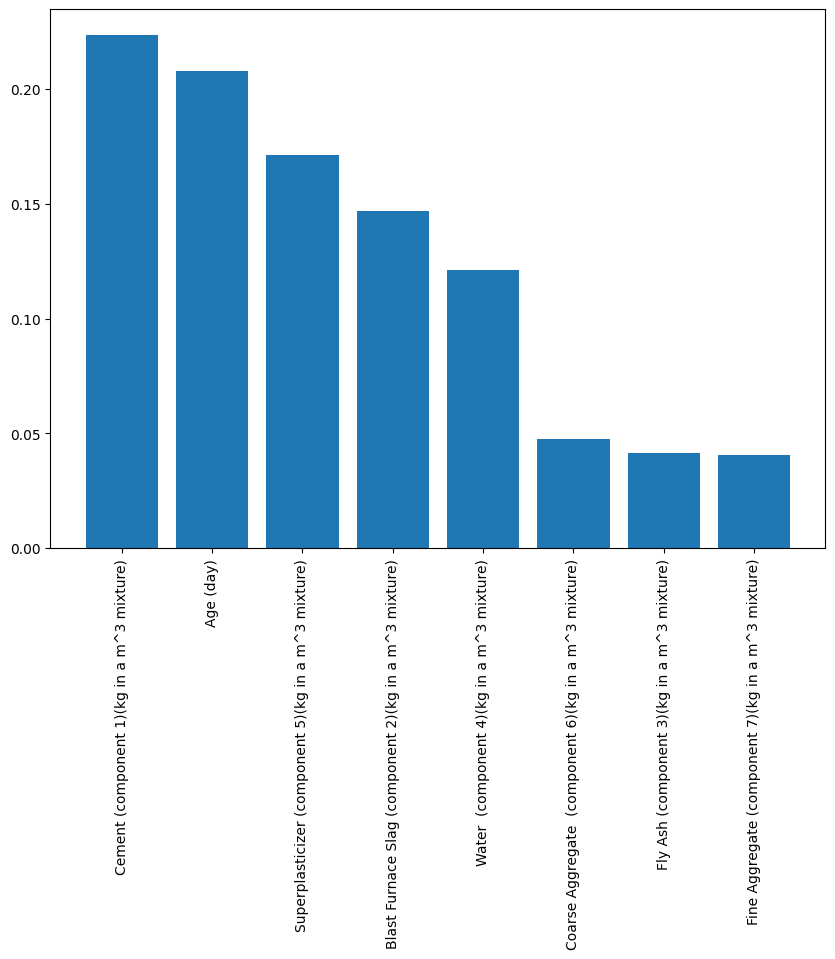

In [38]:
importances = xgb_reg.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
plt.figure(figsize=(10, 7))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), df.columns[:-1][indices], rotation=90)
plt.show()

### Hyperparameter tuning

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [41]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}